# Analysis

## Import Libraries & Reading a File

In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [220]:
df = pd.read_excel("Sales_Analysis_New.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Country,Item Type,Sales Channel,Order Priority,Order Date and ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
2,Sub-Saharan Africa,CHAD,Office Supplies,Online,Low,40570 - 292494523,40586,4484,651.21,524.96,2920025.64,2353920.64,566105
3,Europe,Latvia,Beverages,Online,Cancelled,42366 361825549,42392,1075,47.45,31.79,51008.75,34174.25,16834.5
4,Middle East and North Africa,Pakistan,Vegetables,Offline,Cancelled,40556 141515767,40575,6515,154.06,90.93,1003700.9,592408.95,411291.95


In [221]:
# Set the second row as the header
df.columns = df.iloc[1]
df = df[2:]  # Remove the first two rows
df.reset_index(drop=True, inplace=True)  # Reset the index
df.head()

1,Region,Country,Item Type,Sales Channel,Order Priority,Order Date and ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,CHAD,Office Supplies,Online,Low,40570 - 292494523,40586,4484,651.21,524.96,2920025.64,2353920.64,566105
1,Europe,Latvia,Beverages,Online,Cancelled,42366 361825549,42392,1075,47.45,31.79,51008.75,34174.25,16834.5
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Cancelled,40556 141515767,40575,6515,154.06,90.93,1003700.9,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,Cancelled,41163 - 500364005,41188,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,Cancelled,42304 127481591,42343,3491,47.45,31.79,165647.95,110978.89,54669.06


In [222]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date and ID', 'Ship Date', ' Units Sold ', ' Unit Price ',
       ' Unit Cost ', ' Total Revenue ', ' Total Cost ', ' Total Profit '],
      dtype='object', name=1)

In [223]:
df.describe(percentiles=[.2,.4,.6,.8], include='all')

1,Region,Country,Item Type,Sales Channel,Order Priority,Order Date and ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,10004,10004,10004,10004,10004,10004,10004,10004,10004.00,10004.00,10004.00,10004.00,10004.00
unique,9,197,12,2,4,10000,2719,6307,12.00,12.00,9600.00,9599.00,9598.00
top,Europe,Lithuania,Personal Care,Online,Cancelled,42504 - 192088067,41912,4659,81.73,56.67,1436917.62,180848.64,381431.46
freq,2634,72,888,5061,2555,2,12,6,888.00,888.00,3.00,3.00,3.00


In [224]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date and ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object', name=1)

In [225]:
df.rename(columns={
     'Region':'region',
     'Country':'country',
     'Item Type':'item_type',
     'Sales Channel':'sales_channel',
     'Order Priority':'order_priority',
     'Order Date and ID':'order_date_id',
     'Ship Date':'ship_date',
     'Units Sold':'units_sold',
     'Unit Price':'unit_price',
     'Unit Cost':'unit_cost',
     'Total Revenue':'total_revenue',
     'Total Cost':'total_cost',
     'Total Profit':'total_profit'
}, inplace=True)
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date_id', 'ship_date', 'units_sold', 'unit_price', 'unit_cost',
       'total_revenue', 'total_cost', 'total_profit'],
      dtype='object', name=1)

In [226]:
df['region'].unique()

array(['Sub-Saharan Africa', 'Europe', 'Middle East and North Africa',
       'Sub-Saharan\n Africa', 'Asia', 'Sub-Saharan \nAfrica',
       'Central America and the Caribbean', nan, 'Australia and Oceania',
       'North America'], dtype=object)

In [227]:
df['sales_channel'].unique()

array(['Online', 'Offline', nan], dtype=object)

In [228]:
df['order_priority'].unique()

array(['Low', 'Cancelled', 'High', 'Medium', nan], dtype=object)

In [229]:
df['item_type'].unique()

array(['Office Supplies', 'Beverages', 'Vegetables', 'Household',
       'Baby Food', 'Meat', 'Cereal', nan, 'Clothes', 'Snacks',
       'Personal Care', 'Cosmetics', 'Fruits'], dtype=object)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          10004 non-null  object
 1   country         10004 non-null  object
 2   item_type       10004 non-null  object
 3   sales_channel   10004 non-null  object
 4   order_priority  10004 non-null  object
 5   order_date_id   10004 non-null  object
 6   ship_date       10004 non-null  object
 7   units_sold      10004 non-null  object
 8   unit_price      10004 non-null  object
 9   unit_cost       10004 non-null  object
 10  total_revenue   10004 non-null  object
 11  total_cost      10004 non-null  object
 12  total_profit    10004 non-null  object
dtypes: object(13)
memory usage: 1017.6+ KB


In [231]:
df.size, df.shape

(130234, (10018, 13))

## Preprocessing & Missing value Handleing

In [232]:
df.isnull().sum()

1
region            14
country           14
item_type         14
sales_channel     14
order_priority    14
order_date_id     14
ship_date         14
units_sold        14
unit_price        14
unit_cost         14
total_revenue     14
total_cost        14
total_profit      14
dtype: int64

In [233]:
df[df.isnull().any(axis=1)]

1,region,country,item_type,sales_channel,order_priority,order_date_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
clean_df = df.dropna().reset_index(drop=True)
clean_df.head(15).tail(3)

1,region,country,item_type,sales_channel,order_priority,order_date_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
12,Europe,GERMANY,Office Supplies,Online,Cancelled,42057 498603188,42062,6618,651.21,524.96,4309707.78,3474185.28,835522.5
13,Asia,India,Household,Online,Cancelled,42609 151717174,42615,5338,668.27,502.54,3567225.26,2682558.52,884666.74
14,Middle East and North Africa,Algeria,Clothes,Offline,Cancelled,40715 181401288,40745,9527,109.28,35.84,1041110.56,341447.68,699662.88


In [235]:
region_lst = clean_df['region'].to_list()
for idx, region in enumerate(region_lst):
    region_lst[idx] = region.replace('\n', '')
print(region_lst)
clean_df['region'] = region_lst
clean_df['region'].unique()

['Sub-Saharan Africa', 'Europe', 'Middle East and North Africa', 'Sub-Saharan Africa', 'Europe', 'Sub-Saharan Africa', 'Asia', 'Asia', 'Sub-Saharan Africa', 'Central America and the Caribbean', 'Sub-Saharan Africa', 'Europe', 'Europe', 'Asia', 'Middle East and North Africa', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Middle East and North Africa', 'Europe', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Europe', 'Central America and the Caribbean', 'Central America and the Caribbean', 'Europe', 'Central America and the Caribbean', 'Middle East and North Africa', 'Asia', 'Europe', 'Sub-Saharan Africa', 'Central America and the Caribbean', 'Central America and the Caribbean', 'Europe', 'Asia', 'Middle East and North Africa', 'Europe', 'Middle East and North Africa', 'Europe', 'Europe', 'Central America and the Ca

array(['Sub-Saharan Africa', 'Europe', 'Middle East and North Africa',
       'Asia', 'Central America and the Caribbean',
       'Australia and Oceania', 'North America'], dtype=object)

In [236]:
df = clean_df

In [237]:
order_dt_id_lst = df['order_date_id'].values.tolist()

In [238]:
order_date = []
order_id = []
# 
for text in order_dt_id_lst:
     parts = text.split(maxsplit=2)
     if len(parts) == 2:
          order_date.append(parts[0].strip())
          order_id.append(parts[1].strip())
     else:
          order_date.append(parts[0].strip())
          order_id.append(parts[2].strip())

In [239]:
len(order_date)
# order_date
df['order_date'] = order_date

In [240]:
filtered_order_date = [i for i in order_date if i.isdigit()]
print(filtered_order_date)

['40570', '42366', '40556', '41163', '42304', '41100', '40594', '42835', '41964', '42189', '42577', '41202', '42057', '42609', '40715', '41536', '42323', '42100', '40280', '40812', '42504', '42504', '40404', '41012', '41536', '42340', '42792', '42792', '42652', '40683', '40708', '42175', '40760', '42704', '42704', '42190', '42088', '41508', '42715', '41448', '42132', '42667', '42667', '41343', '40986', '42046', '41212', '41096', '40547', '41572', '42416', '42637', '40451', '42937', '41465', '41188', '40698', '41741', '42303', '40759', '42790', '40632', '42126', '41671', '40971', '42116', '40675', '40898', '40514', '40404', '40456', '40947', '41160', '40766', '41210', '41558', '42649', '42944', '42678', '42472', '41956', '41147', '41835', '40665', '41589', '40647', '41186', '41408', '41286', '41185', '40474', '41676', '40790', '42502', '41210', '42607', '41572', '40585', '42517', '40945', '40902', '40890', '42571', '41078', '42860', '41113', '42746', '42070', '40703', '40650', '42923', 

In [241]:
filtered_order_date = set(filtered_order_date)
len(filtered_order_date)

2667

In [242]:
# Filter out non-numeric values
filtered_order_date = [i for i in order_date if i.isdigit()]
converted_dt_time = []
# Convert to datetime objects
for i in filtered_order_date:
    converted_dt_time.append(datetime.datetime.fromtimestamp(int(i)).isoformat())
print(converted_dt_time)
    

['1970-01-01T16:46:10', '1970-01-01T17:16:06', '1970-01-01T16:45:56', '1970-01-01T16:56:03', '1970-01-01T17:15:04', '1970-01-01T16:55:00', '1970-01-01T16:46:34', '1970-01-01T17:23:55', '1970-01-01T17:09:24', '1970-01-01T17:13:09', '1970-01-01T17:19:37', '1970-01-01T16:56:42', '1970-01-01T17:10:57', '1970-01-01T17:20:09', '1970-01-01T16:48:35', '1970-01-01T17:02:16', '1970-01-01T17:15:23', '1970-01-01T17:11:40', '1970-01-01T16:41:20', '1970-01-01T16:50:12', '1970-01-01T17:18:24', '1970-01-01T17:18:24', '1970-01-01T16:43:24', '1970-01-01T16:53:32', '1970-01-01T17:02:16', '1970-01-01T17:15:40', '1970-01-01T17:23:12', '1970-01-01T17:23:12', '1970-01-01T17:20:52', '1970-01-01T16:48:03', '1970-01-01T16:48:28', '1970-01-01T17:12:55', '1970-01-01T16:49:20', '1970-01-01T17:21:44', '1970-01-01T17:21:44', '1970-01-01T17:13:10', '1970-01-01T17:11:28', '1970-01-01T17:01:48', '1970-01-01T17:21:55', '1970-01-01T17:00:48', '1970-01-01T17:12:12', '1970-01-01T17:21:07', '1970-01-01T17:21:07', '1970-01-0

In [243]:
x = str('1970-01-01T16:48:20')
date, time = x.split('T')
# x.split('T')
date, time

('1970-01-01', '16:48:20')

In [244]:
date_lst = []
time_lst =[]
for i in converted_dt_time:
     date, time = i.split('T')
     date_lst.append(date)
     time_lst.append(time)
print(date_lst, '\n', time_lst)

['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970

In [245]:
# Ensure the DataFrame matches the length of the lists
df_filtered = df.iloc[:len(filtered_order_date)].copy()

# Assign the lists to the DataFrame
df_filtered['order_id'] = order_id[:len(df_filtered)]
df_filtered['order_date'] = date_lst[:len(df_filtered)]
df_filtered['order_time'] = time_lst[:len(df_filtered)]

# Display the filtered DataFrame
df_filtered.head()

1,region,country,item_type,sales_channel,order_priority,order_date_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,order_date,order_id,order_time
0,Sub-Saharan Africa,CHAD,Office Supplies,Online,Low,40570 - 292494523,40586,4484,651.21,524.96,2920025.64,2353920.64,566105,1970-01-01,292494523,16:46:10
1,Europe,Latvia,Beverages,Online,Cancelled,42366 361825549,42392,1075,47.45,31.79,51008.75,34174.25,16834.5,1970-01-01,361825549,17:16:06
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Cancelled,40556 141515767,40575,6515,154.06,90.93,1003700.9,592408.95,411291.95,1970-01-01,141515767,16:45:56
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,Cancelled,41163 - 500364005,41188,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,1970-01-01,500364005,16:56:03
4,Europe,Czech Republic,Beverages,Online,Cancelled,42304 127481591,42343,3491,47.45,31.79,165647.95,110978.89,54669.06,1970-01-01,127481591,17:15:04


In [246]:
df = df_filtered
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date_id', 'ship_date', 'units_sold', 'unit_price', 'unit_cost',
       'total_revenue', 'total_cost', 'total_profit', 'order_date', 'order_id',
       'order_time'],
      dtype='object', name=1)

In [247]:
print("Total no of order date : ", len(df['order_date'].unique()), " . And That date is ", df['order_date'].unique())
print("Total no of order time : ", len(df['order_time'].unique()))

Total no of order date :  1  . And That date is  ['1970-01-01']
Total no of order time :  2667


In [248]:
df.head()

1,region,country,item_type,sales_channel,order_priority,order_date_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,order_date,order_id,order_time
0,Sub-Saharan Africa,CHAD,Office Supplies,Online,Low,40570 - 292494523,40586,4484,651.21,524.96,2920025.64,2353920.64,566105,1970-01-01,292494523,16:46:10
1,Europe,Latvia,Beverages,Online,Cancelled,42366 361825549,42392,1075,47.45,31.79,51008.75,34174.25,16834.5,1970-01-01,361825549,17:16:06
2,Middle East and North Africa,Pakistan,Vegetables,Offline,Cancelled,40556 141515767,40575,6515,154.06,90.93,1003700.9,592408.95,411291.95,1970-01-01,141515767,16:45:56
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,Cancelled,41163 - 500364005,41188,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,1970-01-01,500364005,16:56:03
4,Europe,Czech Republic,Beverages,Online,Cancelled,42304 127481591,42343,3491,47.45,31.79,165647.95,110978.89,54669.06,1970-01-01,127481591,17:15:04


## Exploratory Data Analysis

### Total Profit per Region

In [249]:
region_profit = df.groupby('region')['total_profit'].sum().sort_values(ascending=False)
region_profit

region
Europe                               948879679.409999
Sub-Saharan Africa                   922119728.740001
Asia                                     538457364.09
Middle East and North Africa             455751736.12
Central America and the Caribbean        373323694.32
Australia and Oceania                    302891870.75
North America                             86713245.72
Name: total_profit, dtype: object

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_31364\3073344174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')


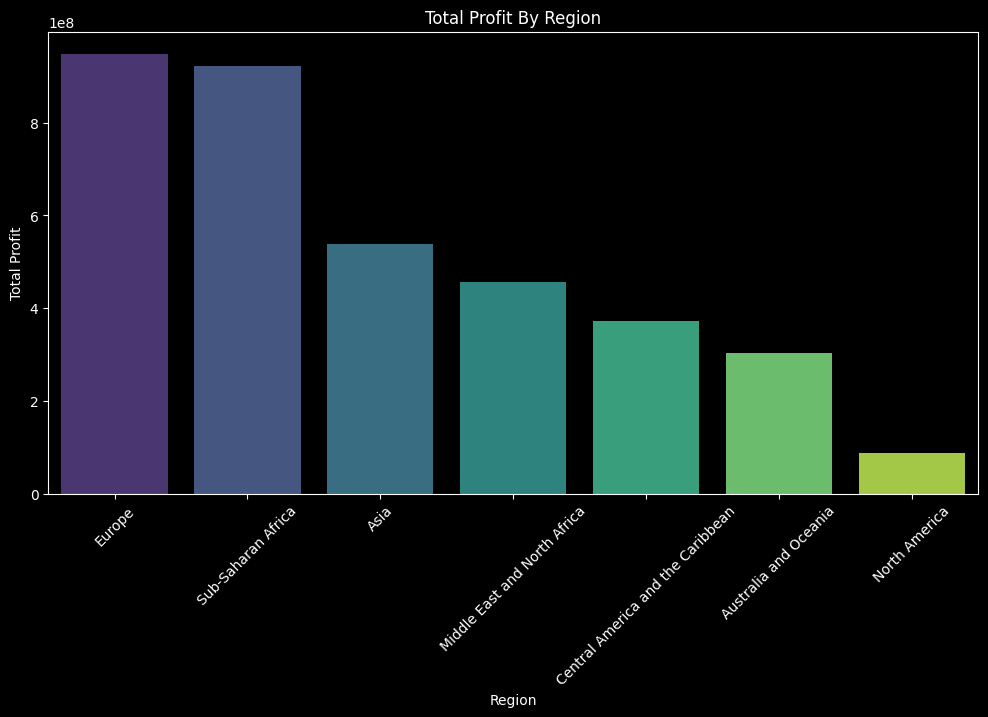

In [250]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')
plt.title('Total Profit By Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

### Sales Channel Performance

In [251]:
sales_channel_effectiveness = df.groupby('sales_channel').agg({
     'total_revenue' : 'sum',
     'total_profit' : 'sum',
     'units_sold' : 'sum'
}).sort_values(by='total_revenue', ascending=False)
sales_channel_effectiveness

sales_channel
Offline    6158353236.070004
Online     6104924238.049988
Name: total_revenue, dtype: object

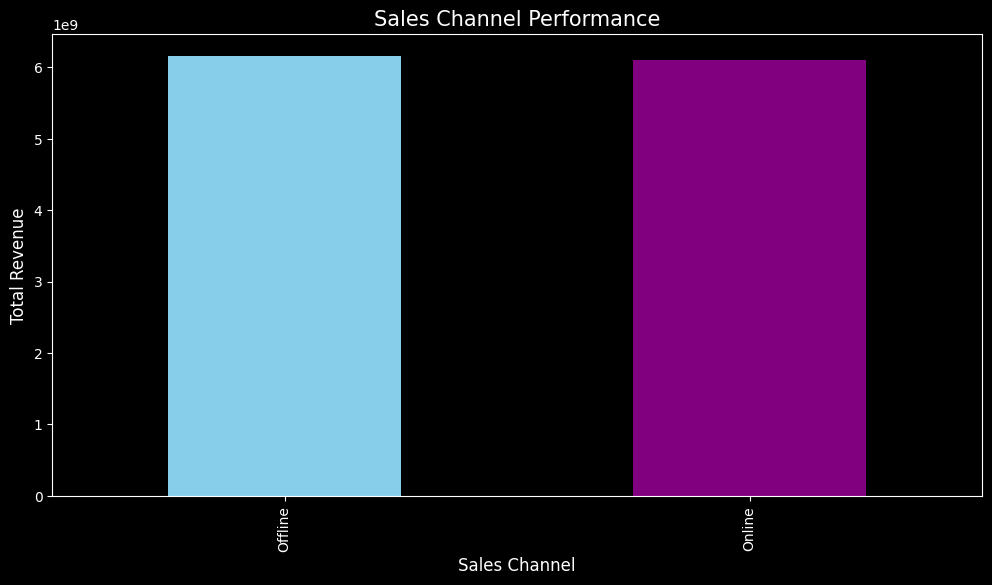

In [289]:
plt.figure(figsize=(12,6))
sales_channel_effectiveness['total_revenue'].plot(kind='bar', color=['skyblue', 'purple'])
plt.title('Sales Channel Performance', fontsize=15)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

1,total_revenue,total_profit,units_sold
sales_channel,,,
Offline,6158353236.070004,1821769335.299994,22886312
Online,6104924238.049988,1806367983.850001,23045775


### Region-wise Sales & Profit

In [269]:
region_sales = df.groupby(df['region'])[['total_revenue', 'total_profit', 'units_sold']].sum()
region_sales.sort_values(by='total_revenue', ascending=False)

1,total_revenue,total_profit,units_sold
region,,,
Europe,3234689838.05,948879679.409999,11933755
Sub-Saharan Africa,3093085480.120002,922119728.740001,11862342
Asia,1832153572.940001,538457364.09,6742131
Middle East and North Africa,1529469062.260001,455751736.12,5853960
Central America and the Caribbean,1294327330.489998,373323694.32,4810276
Australia and Oceania,986999420.329999,302891870.75,3681456
North America,292552769.93,86713245.72,1048167


C:\Users\KALYANI\AppData\Local\Temp\ipykernel_31364\265231681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = region_sales.reset_index(),x='region', y='total_revenue', palette='viridis')


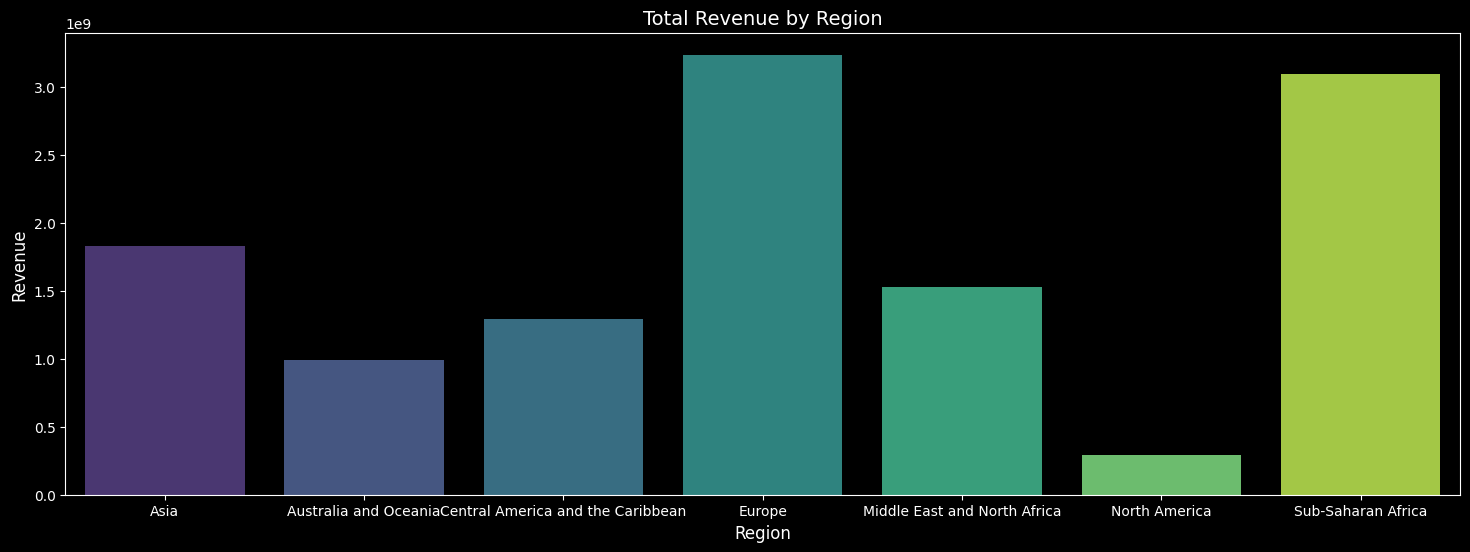

In [270]:
plt.figure(figsize=(18, 6))
sns.barplot(data = region_sales.reset_index(),x='region', y='total_revenue', palette='viridis')
plt.title('Total Revenue by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

### Sales and Profit by Item type

In [268]:
item_sales_by_type = df.groupby('item_type')['total_revenue'].sum().sort_values(ascending=False)
item_sales_by_type

item_type
Household          2681641875.240001
Office Supplies    2476849232.970002
Cosmetics          1621452384.000002
Meat               1549362758.370001
Baby Food          1002752093.440001
Cereal                   777282704.0
Vegetables              601717380.04
Snacks                  578207555.46
Clothes                  438607300.8
Personal Care           332883429.45
Beverages               167936036.45
Fruits                    34584723.9
Name: total_revenue, dtype: object

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_31364\2357585919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_sales_by_type.reset_index(), x='item_type', y='total_revenue', palette='magma')


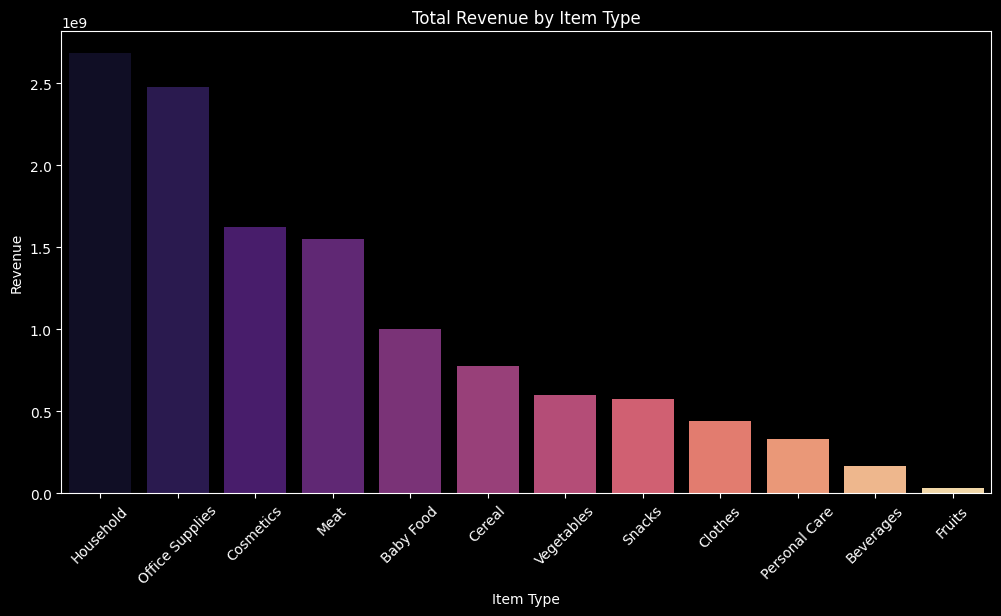

In [267]:
plt.figure(figsize=(12, 6))
sns.barplot(data=item_sales_by_type.reset_index(), x='item_type', y='total_revenue', palette='magma')
plt.title('Total Revenue by Item Type')
plt.ylabel('Revenue')
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.show()

##### Total Revenue : twelve billion, two hundred sixty three million, two hundred seventy seven thousand, four hundred seventy four

##### Total Profit : three billion, six hundred twenty eight million, one hundred thirty seven thousand, three hundred nineteen

### Trends Over Time

In [278]:
# Combine order_date and order_time to create a proper datetime object
df['order_datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'])

# Group by the new datetime column and aggregate total_revenue
monthly_sales = df.groupby(['order_datetime']).agg({'total_revenue': 'sum'}).reset_index()
monthly_sales['order_datetime'] = pd.to_datetime(monthly_sales['order_datetime'])
monthly_sales

1,order_datetime,total_revenue
0,1970-01-01 16:39:39,1436474.86
1,1970-01-01 16:39:40,2087957.9
2,1970-01-01 16:39:41,2211394.89
3,1970-01-01 16:39:42,5715253.49
4,1970-01-01 16:39:43,8180584.52
...,...,...
2662,1970-01-01 17:25:40,4455740.06
2663,1970-01-01 17:25:41,5060186.38
2664,1970-01-01 17:25:42,9339656.8
2665,1970-01-01 17:25:43,5507881.34


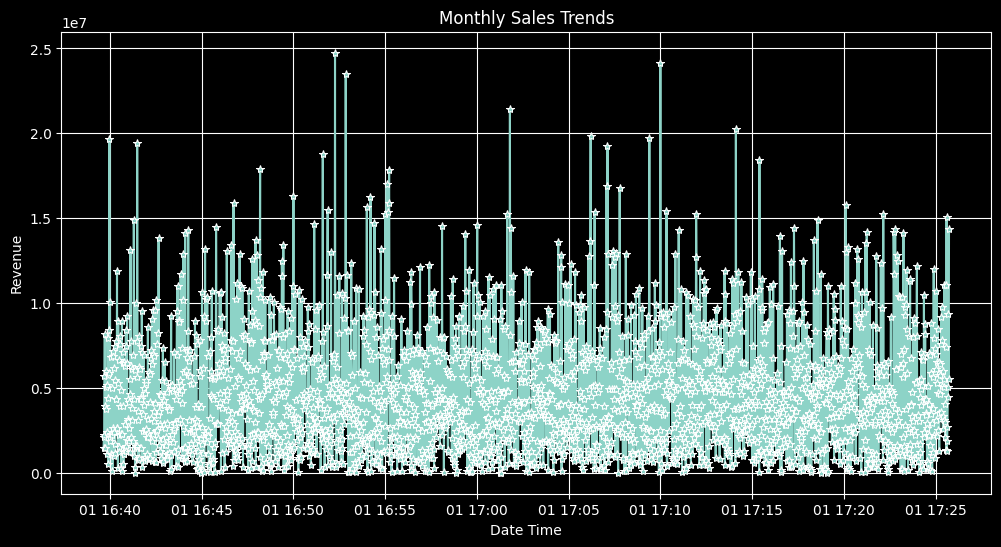

In [282]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_datetime', y='total_revenue', marker='*')
plt.title('Monthly Sales Trends')
plt.xlabel('Date Time')
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [256]:
time_trendz = df.groupby(df['order_time'])[['total_revenue', 'total_profit']].sum()
time_trendz

1,total_revenue,total_profit
order_time,,
16:39:39,1436474.86,538654.32
16:39:40,2087957.9,1018773.82
16:39:41,2211394.89,686119.5
16:39:42,5715253.49,1867248.47
16:39:43,8180584.52,2862260.28
...,...,...
17:25:40,4455740.06,1531630.31
17:25:41,5060186.38,1026136.28
17:25:42,9339656.8,2912589.4


<Figure size 1200x600 with 0 Axes>

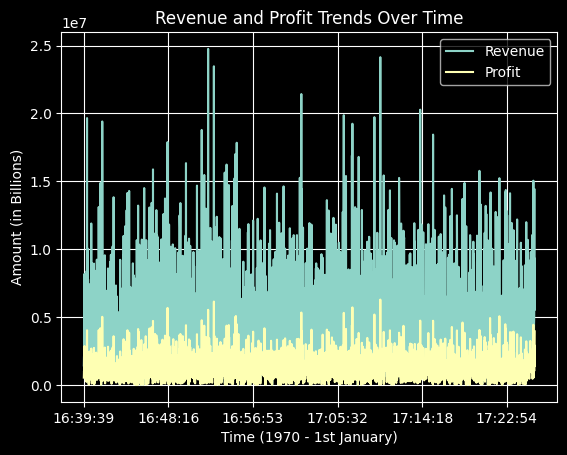

In [284]:
plt.figure(figsize=(12, 6))
time_trendz.plot()
plt.title('Revenue and Profit Trends Over Time')
plt.xlabel('Time (1970 - 1st January)')
plt.ylabel('Amount (in Billions)')
plt.legend(['Revenue', 'Profit'])
plt.grid()
plt.show()

### Impact of Order Priority

In [271]:
priority_impact = df.groupby('order_priority').agg({
     'total_revenue' : 'sum',
     'total_profit' : 'sum',
     'units_sold' : 'sum'
})
priority_impact.sort_values(by='total_revenue', ascending=False)

1,total_revenue,total_profit,units_sold
order_priority,,,
Cancelled,3126593728.699996,943915959.120001,11760669
High,3107566384.849997,915199848.490001,11670070
Low,3100784162.030004,907093389.469999,11482315
Medium,2928333198.540001,861928122.069999,11019033


<Axes: xlabel='order_priority', ylabel='total_profit'>

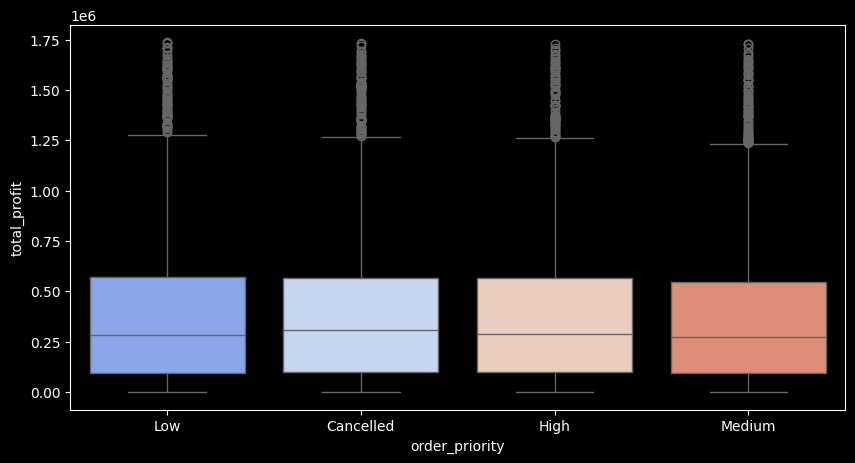

In [274]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='order_priority', y='total_profit', palette='coolwarm')